In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

dataset = pd.read_csv('Social_Network_Ads.csv')


In [13]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [14]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:,4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [15]:


classifier = GaussianNB(priors=[0.4, 0.6], var_smoothing=1e-9)
classifier.fit(X_train, y_train)


GaussianNB(priors=[0.4, 0.6])

In [16]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [17]:
y_pred = classifier.predict(X_test)


In [18]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [19]:

cm = confusion_matrix(y_test, y_pred)


In [20]:
cm

array([[60,  8],
       [ 2, 30]], dtype=int64)

In [21]:

print("The accuracy score is:", accuracy_score(y_pred, y_test))


The accuracy score is: 0.9


In [22]:

print("classification_report:")
print( classification_report(y_pred, y_test))

classification_report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        62
           1       0.94      0.79      0.86        38

    accuracy                           0.90       100
   macro avg       0.91      0.88      0.89       100
weighted avg       0.90      0.90      0.90       100



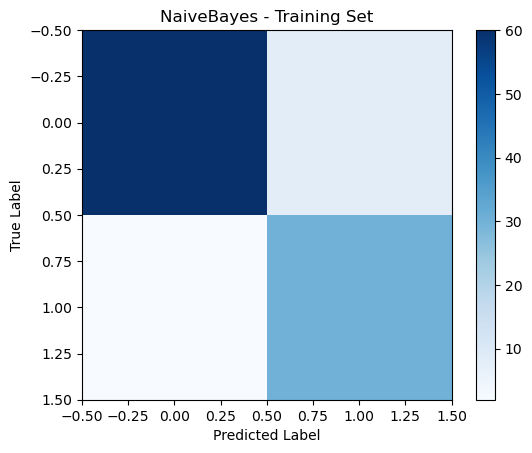

In [24]:
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('NaiveBayes - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.colorbar()

# Show the plot
plt.show()